In [299]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [326]:
df=pd.read_excel(r'DataFinal17-20.xlsx',sheet_name='2018')
df1=df.drop(['Total'], axis=1)
df1=df1.iloc[:,2:15].values
#scaler = MinMaxScaler()
scaler= StandardScaler()
# transform data
df1 = scaler.fit_transform(df1)
df1

array([[ 1.03839779e+00,  1.47924093e+00,  2.16242014e-01,
         4.18233512e-01,  2.10782061e-01, -4.24819049e-01,
         2.43093441e-01,  1.61083351e+00, -2.39103119e-02,
        -1.29436796e-01,  4.60611741e-01,  6.20280914e-01,
         4.84659288e-01],
       [-4.28300572e-01, -7.54672873e-01, -1.08121007e-02,
        -2.70326038e-01, -3.92857944e-01, -4.24819049e-01,
        -2.85161130e-01, -6.67046173e-01, -3.32409862e-01,
        -3.59837466e-01, -3.88191966e-02, -2.42553166e-01,
        -5.32496084e-01],
       [ 1.25306162e-01, -2.20996680e-01,  9.78177113e-02,
         2.74993022e-01, -1.84217271e-01, -3.73370376e-01,
         1.86896146e-01, -6.01020676e-01, -1.60052504e-01,
        -1.61359780e-01,  5.93366068e-01,  3.83022224e-02,
        -1.32030054e-01],
       [ 2.11582537e-01,  5.65833605e-01,  5.67062883e-01,
         2.74993022e-01, -9.30635789e-02, -4.24819049e-01,
        -7.16114099e-02,  2.04490399e-01,  4.91261581e-01,
        -4.75474015e-02,  3.30604054e

In [327]:
from sklearn.cluster import KMeans

#create a list for the wcss parameter
wcss = []
#test with 14 clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [328]:
wcss

[455.00000000000006,
 151.88198373485318,
 94.4962974367791,
 52.36778125280657,
 37.66311578686052,
 27.85608724129876,
 22.956380978779134,
 18.411323303516994,
 15.654980301497902,
 13.505706826278605,
 11.131631283310846,
 9.189929945241067,
 8.259155435971405,
 7.249011347468659]

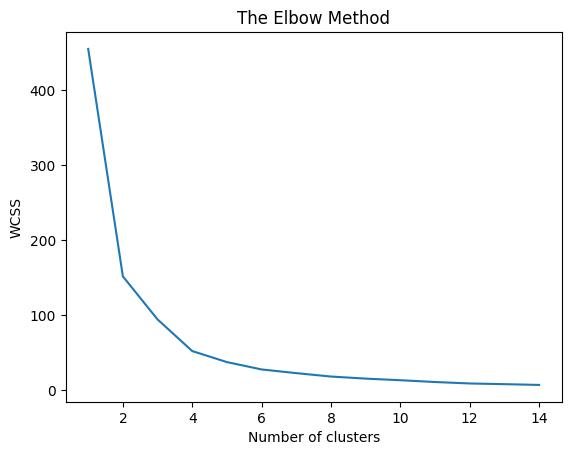

In [329]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [330]:
km=KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans=km.fit_predict(df1)

In [331]:
y_kmeans

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1])

In [332]:
df['cluster']=y_kmeans
df.head()

,SrNo,State/UT/District,Homicide/Murder,Causing death by negligence,Hurt,Assault on woman,Kidnapping and abduction,Human trafficking,Rape,Offence against public tranquility,...,Others,Total,Population,Crime Rate,Sex Ratio,Literacy,Density,Latitude,Longitude,cluster
0,1,Ahmednagar,308,799,1458,476,431,0,87,815,...,783,12613,4543159,0.277626,939,0.7905,266,19.094829,74.747979,0
1,2,Akola,104,146,1203,202,133,0,40,125,...,187,5579,1813906,0.307568,946,0.8805,320,20.700216,77.008168,1
2,3,Amravati,181,302,1325,419,236,1,82,145,...,381,9577,2888445,0.331562,951,0.8738,237,20.931982,77.752304,1
3,4,Aurangbad,193,532,1852,419,281,0,59,389,...,364,15929,3701282,0.430364,923,0.7902,366,19.876165,75.343314,0
4,5,Beed,173,318,944,249,145,7,35,421,...,346,5352,2585049,0.207037,916,0.7699,242,18.990088,75.753132,1


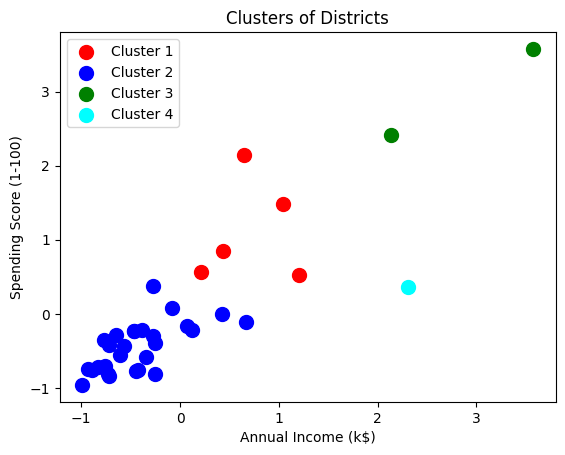

In [333]:
#plt.scatter(df['SrNo'],df['cluster'])
#for col in df.columns:
 #   print(col)
plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df1[y_kmeans == 2, 0], df1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df1[y_kmeans == 3, 0], df1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(df1[y_kmeans == 4, 0], df1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(df1[y_kmeans == 5, 0], df1[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Districts')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [334]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [335]:
z = linkage(df1, method="complete",metric="euclidean")

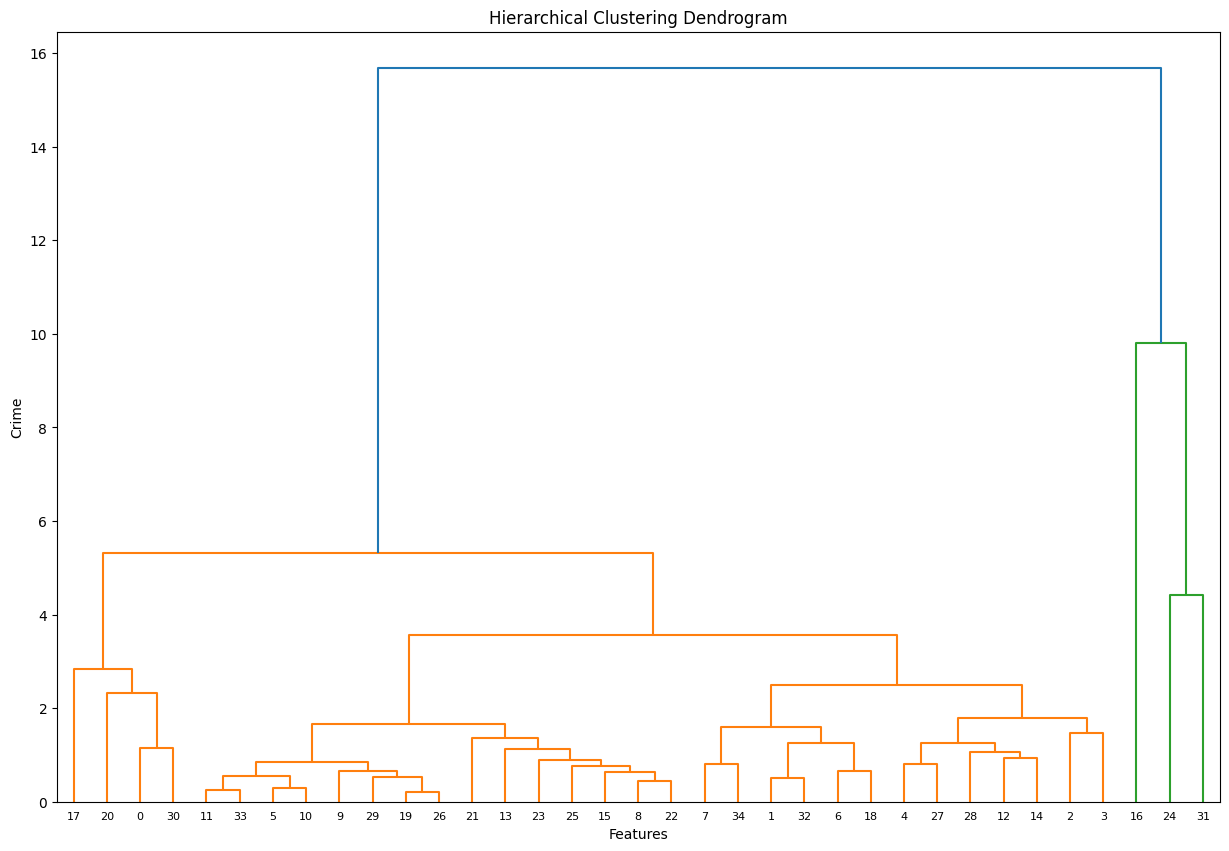

In [336]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [245]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx', sheet_name='your Excel sheet name')